Problem Statements

# There are various stocks for which we have collected a data set, which all stocks are  apparently similar in performance

# How many Unique patterns that exist in the historical stock data set, based on  fluctuations in price.



# Identify which all stocks are moving together and which all stocks are different from each other. 


Dataset Link

https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/vie

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from datetime import datetime
import seaborn as sns

In [24]:
df = pd.read_csv(r"D:\Machine Learning Sentex\datasets\data_stocks.csv")

In [25]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [27]:
df['SP500']

0        2363.6101
1        2364.1001
2        2362.6799
3        2364.3101
4        2364.8501
           ...    
41261    2472.2200
41262    2471.7700
41263    2470.0300
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64

In [28]:
df.drop('DATE', axis = 1, inplace = True)

In [29]:
# Subtracting next day's stock price from current price to get Daily movements

def movements(col):
    
    for i,x in enumerate(df[col]):
    
        if i+1 == (len(df[col]) - 1):
            break

        new_val = df[col][i+1] - df[col][i]

        df[col].at[i] = new_val 

In [30]:
for x in df.columns:
    movements(x)

In [31]:
df['SP500']

0           0.4900
1          -1.4202
2           1.6302
3           0.5400
4           0.7700
           ...    
41261      -0.4500
41262      -1.7400
41263       1.4600
41264    2471.4900
41265    2471.4900
Name: SP500, Length: 41266, dtype: float64

In [32]:
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,0.122398,0.002225,0.008435,0.008129,0.004091,0.005260,0.006250,0.001979,0.007397,0.002333,...,0.005203,0.004359,0.002522,0.002009,0.003560,0.002168,0.003296,0.004037,0.005349,0.003262
std,17.214224,0.314302,1.145051,1.082866,0.585629,0.744684,0.804213,0.333276,1.000028,0.316092,...,0.696716,0.701740,0.344925,0.285874,0.532266,0.247795,0.433359,0.535699,0.800060,0.437362
min,-18.280000,-2.570000,-3.580100,-4.719900,-1.600000,-5.170000,-1.940000,-8.470000,-3.910000,-0.760000,...,-1.680000,-1.970000,-0.370000,-1.749000,-0.930000,-0.290000,-0.600000,-1.375000,-10.210000,-2.179000
25%,-0.199900,-0.019900,-0.030000,-0.030000,-0.020000,-0.020000,-0.032500,-0.011300,-0.050000,-0.014900,...,-0.020000,-0.050000,-0.010000,-0.010000,-0.015000,-0.005000,-0.010000,-0.010000,-0.025000,-0.010000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.210000,0.020000,0.030700,0.030000,0.020000,0.020000,0.035000,0.011700,0.050000,0.015000,...,0.020000,0.050000,0.010000,0.010000,0.015000,0.005000,0.010000,0.010000,0.026000,0.010000
max,2471.490000,44.740000,163.980000,155.160000,83.690000,106.470000,114.460000,47.150000,142.410000,45.120000,...,99.700000,99.640000,49.490000,40.940000,76.320000,32.275000,62.075000,76.830000,114.280000,62.680000


In [33]:
df.tail(5)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,-0.45,0.01,0.01,0.070,-0.02,0.025,0.03,0.000,0.025,0.000,...,0.055,0.10,-0.005,0.005,0.010,0.010,-0.010,0.02,0.02,-0.0150
41262,-1.74,0.01,-0.11,-0.095,-0.03,-0.070,-0.05,0.000,-0.120,0.005,...,0.005,0.01,0.015,-0.020,-0.055,-0.005,-0.010,-0.02,-0.02,-0.0250
41263,1.46,-0.03,-0.13,-0.105,-0.04,-0.120,-0.14,-0.015,-0.160,-0.070,...,-0.035,-0.01,-0.010,-0.015,-0.015,-0.015,-0.015,-0.05,-0.08,-0.0549
41264,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [34]:
df.drop(df.tail(2).index,inplace=True) # drop last n rows

In [35]:
df.tail(5)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41259,-0.6199,-0.04,-0.06,-0.050,-0.03,0.030,-0.065,0.015,-0.200,-0.050,...,-0.020,-0.01,0.020,0.005,0.025,0.000,-0.010,-0.025,-0.02,-0.0100
41260,0.2000,0.01,-0.03,0.050,0.01,-0.065,0.040,0.005,-0.205,0.000,...,0.015,0.04,-0.010,-0.020,-0.040,-0.010,0.015,-0.005,0.01,-0.0050
41261,-0.4500,0.01,0.01,0.070,-0.02,0.025,0.030,0.000,0.025,0.000,...,0.055,0.10,-0.005,0.005,0.010,0.010,-0.010,0.020,0.02,-0.0150
41262,-1.7400,0.01,-0.11,-0.095,-0.03,-0.070,-0.050,0.000,-0.120,0.005,...,0.005,0.01,0.015,-0.020,-0.055,-0.005,-0.010,-0.020,-0.02,-0.0250
41263,1.4600,-0.03,-0.13,-0.105,-0.04,-0.120,-0.140,-0.015,-0.160,-0.070,...,-0.035,-0.01,-0.010,-0.015,-0.015,-0.015,-0.015,-0.050,-0.08,-0.0549


In [36]:
mov = df.to_numpy()
mov = mov.T

In [37]:
companies = df.columns

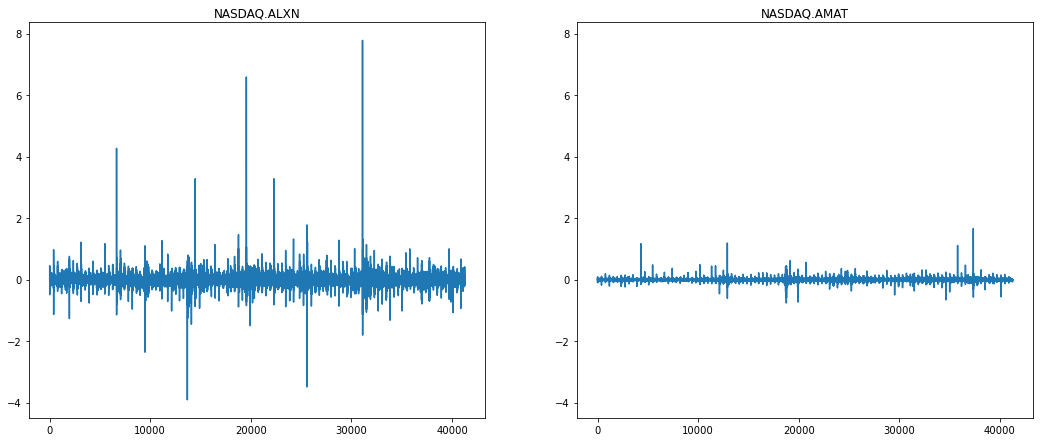

In [38]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(mov[8][:])
plt.title(companies[8])

plt.subplot(222, sharey=ax1)
plt.plot(mov[9][:])
plt.title(companies[9])
plt.show()


In [39]:
#Normalizer

normalizer = Normalizer()

In [40]:
new_mov = normalizer.fit_transform(mov)

print(new_mov.max())
print(new_mov.min())
print(new_mov.mean())

0.9903445178160992
-0.9878251222195971
4.797458204572215e-06


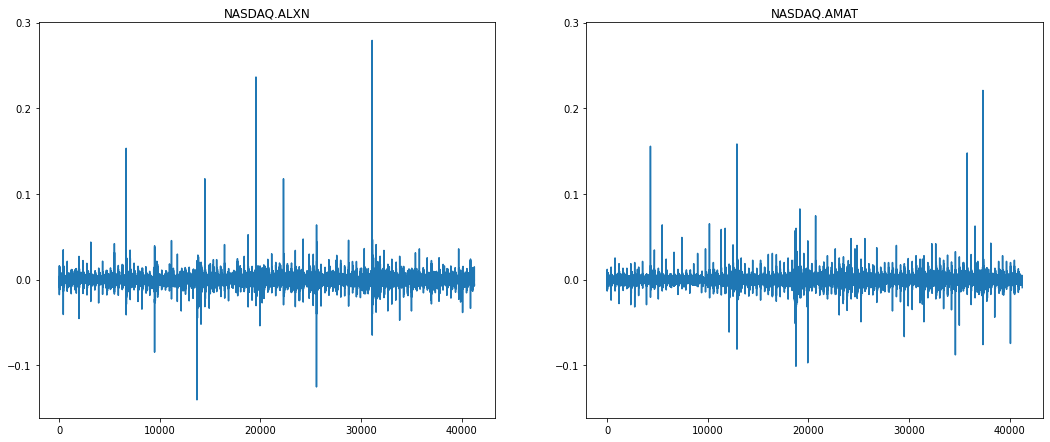

In [41]:
#Plot after Normalizer

plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new_mov[8][:])
plt.title(companies[8])

plt.subplot(222, sharey=ax1)
plt.plot(new_mov[9][:])
plt.title(companies[9])
plt.show()
    

Text(0, 0.5, 'wcss')

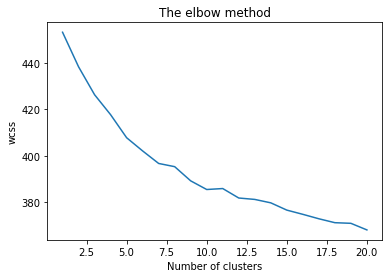

In [42]:
# Elbow method to select number of Clusters

wcss = []
for i in range (1,21):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 32)
    kmeans.fit(new_mov)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

In [43]:
# Applied KMeans

kmeans = KMeans(n_clusters = 10, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)

In [44]:
# Train the data

pipeline.fit(new_mov)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [82]:
#Predict cluster labels

labels = pipeline.predict(new_mov)

dfLabel = pd.DataFrame({'labels':labels, 'companies':companies})

print(dfLabel.sort_values('labels'))

     labels    companies
165       0      NYSE.BA
291       0     NYSE.HON
425       0     NYSE.RTN
424       0     NYSE.RSG
222       0      NYSE.DE
..      ...          ...
20        9  NASDAQ.CERN
42        9  NASDAQ.EXPE
71        9  NASDAQ.LRCX
69        9  NASDAQ.KLAC
60        9  NASDAQ.IDXX

[501 rows x 2 columns]


Text(0.5, 0, 'Clusters')

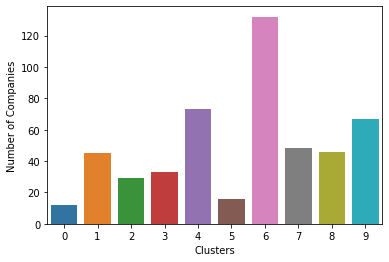

In [83]:
plt.figure()
sns.countplot(x = dfLabel.labels)
plt.ylabel('Number of Companies')
plt.xlabel("Clusters")

In [92]:
# Companies performing similar

label_5 = dfLabel[dfLabel['labels'] == 5]

In [93]:
label_5

,labels,companies
24,5,NASDAQ.CMCSA
32,5,NASDAQ.DISCA
33,5,NASDAQ.DISCK
34,5,NASDAQ.DISH
49,5,NASDAQ.FOX
50,5,NASDAQ.FOXA
100,5,NASDAQ.SNI
112,5,NASDAQ.VIAB
115,5,NASDAQ.VRTX
189,5,NYSE.CBS


In [ ]:
df = pd.read_csv(r"D:\Machine Learning Sentex\datasets\data_stocks.csv")

In [ ]:
df.drop('DATE', axis = 1, inplace = True)

In [99]:
percent = []

for col in df.columns:    
    
    new_val = (df[col][df.shape[0] - 1] / df[col][0]) * 100
    percent.append(round(new_val))           


In [100]:
percent = pd.DataFrame(data = percent, columns = ["Percentage"])
percent

,Percentage
0,105.0
1,106.0
2,114.0
3,120.0
4,102.0
...,...
496,438.0
497,124.0
498,120.0
499,94.0


Text(0, 0.5, 'wcss')

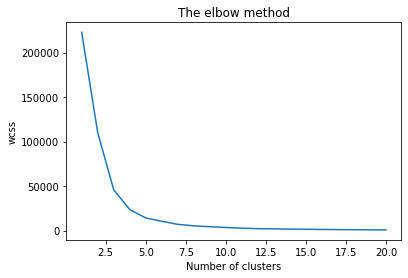

In [101]:
# Elbow method to select number of Clusters

wcss = []
for i in range (1,21):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 32)
    kmeans.fit(percent)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

In [102]:

kmeans = KMeans(n_clusters = 4, max_iter=1000)
kmeans.fit(percent)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
#Predict cluster labels

labels = kmeans.predict(percent)

dfPercent = pd.DataFrame({'labels':labels, 'companies':companies})

print(dfPercent.sort_values('labels'))

     labels    companies
80        0  NASDAQ.NAVI
88        0  NASDAQ.ORLY
411       0     NYSE.PXD
364       0     NYSE.MRO
329       0      NYSE.LB
..      ...          ...
118       3   NASDAQ.WFM
385       3    NYSE.ORCL
115       3  NASDAQ.VRTX
149       3     NYSE.AMT
500       3     NYSE.ZTS

[501 rows x 2 columns]


<AxesSubplot:xlabel='labels', ylabel='count'>

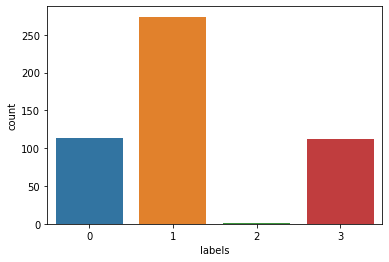

In [104]:
sns.countplot(x = dfPercent.labels)

In [105]:
label_3 = dfPercent[dfPercent['labels'] == 3]

label_3

,labels,companies
2,3,NASDAQ.AAPL
3,3,NASDAQ.ADBE
6,3,NASDAQ.ADSK
8,3,NASDAQ.ALXN
9,3,NASDAQ.AMAT
...,...,...
481,3,NYSE.WAT
491,3,NYSE.WYN
497,3,NYSE.XYL
498,3,NYSE.YUM
